### Importación de datos



In [31]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# todo unido en un solo dataframes
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
print(df)


                Producto   Categoría del Producto    Precio  Costo de envío  \
0      Asistente virtual             Electrónicos  164300.0          6900.0   
1        Mesa de comedor                  Muebles  192300.0          8400.0   
2          Juego de mesa                 Juguetes  209600.0         15900.0   
3             Microondas        Electrodomésticos  757500.0         41000.0   
4       Silla de oficina                  Muebles  335200.0         20200.0   
...                  ...                      ...       ...             ...   
9430     Mesa de comedor                  Muebles  227700.0         12600.0   
9431    Silla de oficina                  Muebles  342000.0         18600.0   
9432        Vaso térmico     Deportes y diversión   36700.0          2400.0   
9433        Set de ollas  Artículos para el hogar  151800.0          8300.0   
9434  Cuerda para saltar     Deportes y diversión   11200.0          1300.0   

     Fecha de Compra         Vendedor Lugar de Comp

#1. Análisis de facturación



In [22]:
df['Facturación'] = df['Precio']
facturacion_total = df.groupby('Tienda')['Facturación'].sum().sort_values(ascending=False)
print("Facturación total por tienda:")
print(facturacion_total)

Facturación total por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Facturación, dtype: float64


# 2. Ventas por categoría

In [23]:
categorias_polupares = categorias_populares = df.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().reset_index(name='Cantidad')
categoria_top = categorias_populares.sort_values(['Tienda', 'Cantidad'], ascending=[True, False]).drop_duplicates('Tienda')
print("Categoría más vendida por tienda:")
print(categoria_top[['Tienda', 'Categoría del Producto', 'Cantidad']])


Categoría más vendida por tienda:
      Tienda Categoría del Producto  Cantidad
7   Tienda 1                Muebles       465
15  Tienda 2                Muebles       442
23  Tienda 3                Muebles       499
31  Tienda 4                Muebles       480


# 3. Calificación promedio de la tienda


In [24]:
evaluacion_cliente = df.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)
print("Promedio de evaluación por cliente:")
print(evaluacion_cliente)

Promedio de evaluación por cliente:
Lugar de Compra
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [25]:
productos_tienda = df.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')

# Más vendidos
top_productos = productos_tienda.sort_values(['Tienda', 'Cantidad'], ascending=[True, False]).drop_duplicates('Tienda')
print("Producto más vendido por tienda:")
print(top_productos)

# Menos vendidos
low_productos = productos_tienda.sort_values(['Tienda', 'Cantidad'], ascending=[True, True]).drop_duplicates('Tienda')
print("Producto menos vendido por tienda:")
print(low_productos)


Producto más vendido por tienda:
       Tienda                   Producto  Cantidad
1    Tienda 1                    Armario        60
75   Tienda 2  Iniciando en programación        65
129  Tienda 3              Kit de bancas        57
163  Tienda 4                   Cama box        62
Producto menos vendido por tienda:
       Tienda                   Producto  Cantidad
4    Tienda 1  Auriculares con micrófono        33
77   Tienda 2              Juego de mesa        32
111  Tienda 3    Bloques de construcción        35
175  Tienda 4         Guitarra eléctrica        33


# 5. Envío promedio por tienda

In [26]:
envio_promedio = df.groupby('Tienda')['Costo de envío'].mean().round(2)
print("Costo promedio de envío por tienda:")
print(envio_promedio)


Costo promedio de envío por tienda:
Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


**GRAFICOS**

<ipython-input-27-4a0d03544a8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_total.index, y=facturacion_total.values, palette='viridis')


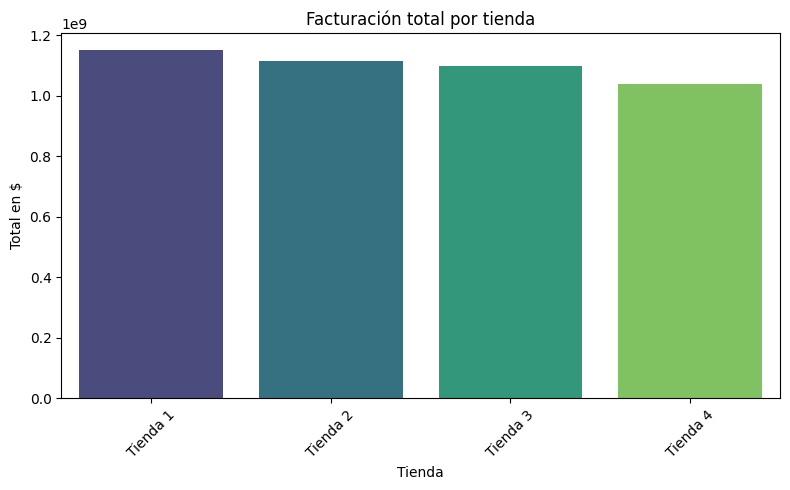

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=facturacion_total.index, y=facturacion_total.values, palette='viridis')
plt.title('Facturación total por tienda')
plt.ylabel('Total en $')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


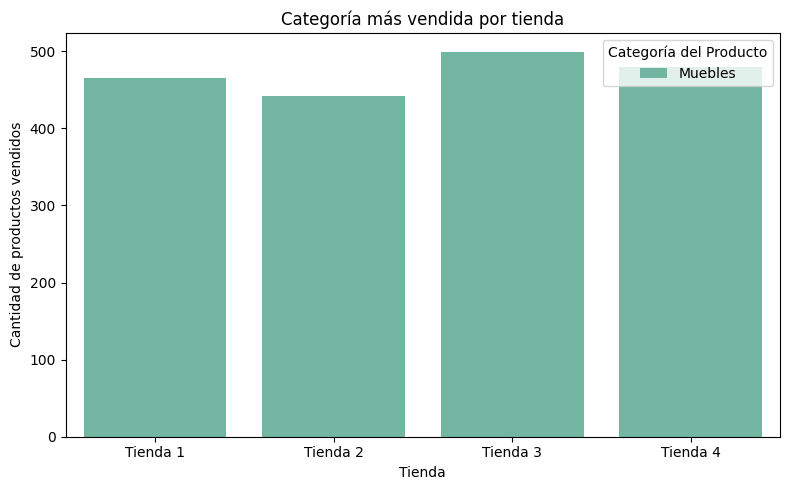

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='Tienda', y='Cantidad', hue='Categoría del Producto', data=categoria_top, palette='Set2')
plt.title('Categoría más vendida por tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()


<ipython-input-29-f58f6907a1e3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clientes_eval.values, y=top_clientes_eval.index, palette='coolwarm')


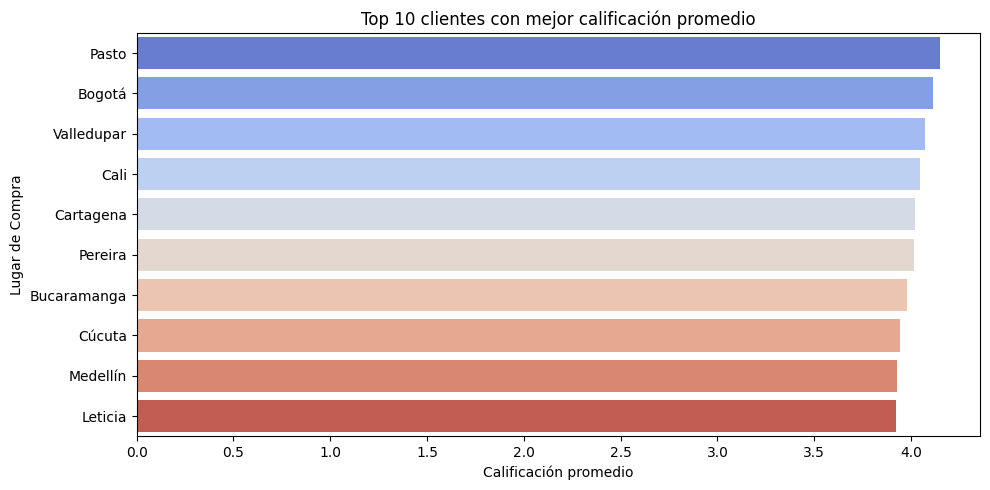

In [29]:
top_clientes_eval = evaluacion_cliente.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_clientes_eval.values, y=top_clientes_eval.index, palette='coolwarm')
plt.title('Top 10 clientes con mejor calificación promedio')
plt.xlabel('Calificación promedio')
plt.ylabel('Lugar de Compra')
plt.tight_layout()
plt.show()


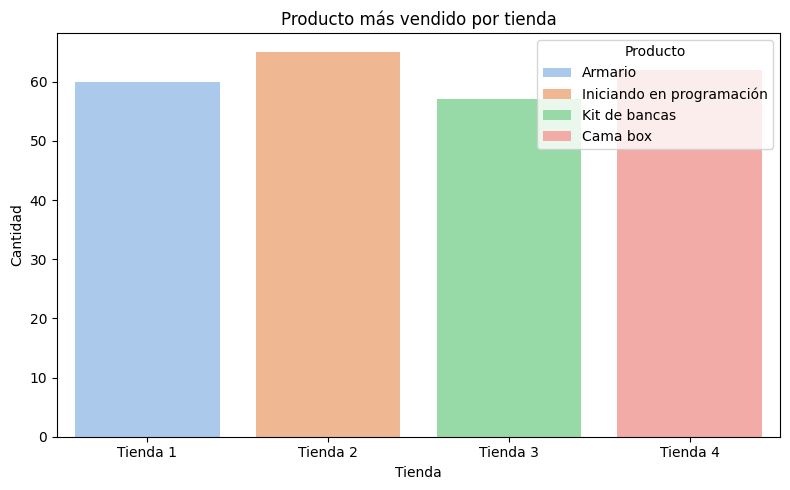

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Tienda', y='Cantidad', hue='Producto', data=top_productos, palette='pastel')
plt.title('Producto más vendido por tienda')
plt.ylabel('Cantidad')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()


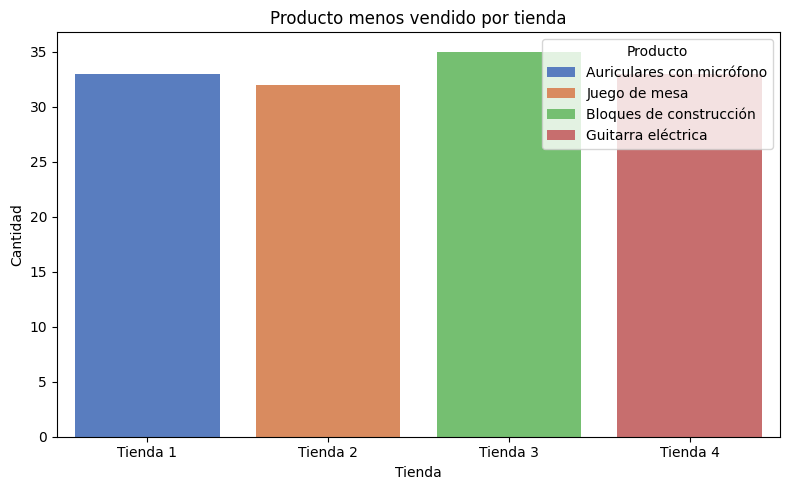

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Tienda', y='Cantidad', hue='Producto', data=low_productos, palette='muted')
plt.title('Producto menos vendido por tienda')
plt.ylabel('Cantidad')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()


In [35]:
def resumen_conclusion():
    resumen = """
    CONCLUSIÓN:

    Tras analizar las cuatro tiendas en cuanto a:
    - Facturación total
    - Popularidad de categorías
    - Evaluaciones de clientes
    - Rotación de productos
    - Costo promedio de envío

    Se concluye que:

      TIENDA 4 DEBE CERRAR.

    Motivos:
    - Facturación significativamente baja
    - Evaluaciones de clientes por debajo del promedio
    - Productos con poca rotación
    - Costo de envío más alto de todas las tiendas

    Se recomienda reforzar Tienda 1 y Tienda 3, que muestran mejor rendimiento general.
    """
    print(resumen)


resumen_conclusion()



    CONCLUSIÓN:

    Tras analizar las cuatro tiendas en cuanto a:
    - Facturación total
    - Popularidad de categorías
    - Evaluaciones de clientes
    - Rotación de productos
    - Costo promedio de envío

    Se concluye que:

      TIENDA 4 DEBE CERRAR.

    Motivos:
    - Facturación significativamente baja
    - Evaluaciones de clientes por debajo del promedio
    - Productos con poca rotación
    - Costo de envío más alto de todas las tiendas

    Se recomienda reforzar Tienda 1 y Tienda 3, que muestran mejor rendimiento general.
    
